
# Data Diri
Nama : Evry Nazyli Ciptanto

Email : evrynazyli@gmail.com

# **1. *Importing Library***

Di tahap ini, kita mengimpor semua library yang dibutuhkan, seperti numpy, pandas, seaborn, matplotlib, dan sklearn.

- Library `os`: Mengelola operasi sistem seperti direktori dan file.
- Library `numpy`: Mendukung operasi numerik pada array dan matriks.
- Library `pandas`: Mengolah dan menganalisis data berbasis tabel.
- Library `seaborn`: Membuat visualisasi statistik yang informatif.
- Library `matplotlib.pyplot`: Membuat grafik dan plot dasar.
- Library `metrics`: Menghitung metrik evaluasi model.
- Library `train_test_split`, `KFold`, `cross_val_score`: Membagi data dan mengevaluasi model dengan cross-validation.
- Library `LinearDiscriminantAnalysis`, `GaussianNB`, `RandomForestClassifier`, `DecisionTreeClassifier`, `KNeighborsClassifier`, `SVC`: Algoritma machine learning untuk klasifikasi.

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# **2. *Data Loading***

## 2.1 *Kaggle Credential*

Mengonfigurasi environment operating system Colab dengan variabel KAGGLE_USERNAME dan KAGGLE_KEY untuk terhubung ke platform Kaggle

In [ ]:
# Username & key API
os.environ['KAGGLE_USERNAME'] = 'evrynazyli'
os.environ['KAGGLE_KEY']      = 'b5446dddabd85b976d2b771049289e1b'

## 2.2 *Download dataset Kaggle*

Mengunduh dataset bernama "Employee.csv" dari Kaggle dengan ID dataset tejashvi14/employee-future-prediction.
Dataset yang digunakan adalah [Employee Future Prediction](https://www.kaggle.com/datasets/tejashvi14/employee-future-prediction)

In [ ]:
# Download dataset dari Kaggle
!kaggle datasets download -d tejashvi14/employee-future-prediction -f Employee.csv

Dataset URL: https://www.kaggle.com/datasets/tejashvi14/employee-future-prediction
License(s): CC0-1.0
100% 191k/191k [00:00<00:00, 312kB/s]
100% 191k/191k [00:00<00:00, 312kB/s]


Membaca file "Employee.csv" sebagai DataFrame menggunakan `pandas` dan menyimpannya dalam variabel `employee`.

In [ ]:
employee = pd.read_csv('Employee.csv')

# **3. *Data Understanding***

## 3.1 *Data pada DataFrame*


Menampilkan 5 baris pertama dari DataFrame `employee` untuk melihat data awal secara sekilas.

In [ ]:
employee.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


Kode `employee.info()` memberikan informasi tentang DataFrame `employee`, seperti jumlah baris, kolom, tipe data setiap kolom, dan jumlah data yang tidak kosong di setiap kolom.

## 3.2 *Exploratory Data Analysis* (EDA)

In [ ]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


Hasil dari `employee.info()` menunjukkan bahwa DataFrame `employee` memiliki 4653 baris dan 9 kolom. Semua kolom tidak memiliki nilai yang hilang (non-null), dengan tipe data yang terdiri dari 5 kolom bertipe `int64` (seperti `JoiningYear`, `PaymentTier`, `Age`, `ExperienceInCurrentDomain`, dan `LeaveOrNot`) dan 4 kolom bertipe `object` (seperti `Education`, `City`, `Gender`, dan `EverBenched`).
<table> <thead><tr> <th>Field</th> <th>Description</th> <th>DataType</th> </tr> </thead> <tbody> <tr> <td>Education</td> <td>Level pendidikan formal tertinggi yang diperoleh oleh karyawan</td> <td>String</td> </tr> <tr> <td>JoiningYear</td> <td>Tahun bergabung dengan perusahaan</td> <td>Integer</td> </tr> <tr> <td>City</td> <td>Lokasi pekerjaan</td> <td>String</td> </tr> <tr> <td>PaymentTier</td> <td>Level pembayaran (1-3). 3 berarti gaji lebih tinggi.</td> <td>Integer</td> </tr> <tr> <td>Age</td> <td>Usia karyawan</td> <td>Integer</td> </tr> <tr> <td>Gender</td> <td>Jenis kelamin karyawan</td> <td>String</td> </tr> <tr> <td>EverBenched</td> <td>Apakah karyawan pernah dibekukan atau tidak</td> <td>Boolean</td> </tr> <tr> <td>ExperienceInCurrentDomain</td> <td>Pengalaman kerja di perusahaan saat ini</td> <td>Integer</td> </tr> <tr> <td>LeaveOrNot</td> <td>Apakah karyawan akan meninggalkan perusahaan dalam 2 tahun ke depan</td> <td>Boolean</td> </tr> </tbody> </table>

In [ ]:
employee.shape

(4653, 9)

Kode `employee.shape` menghasilkan output `(4653, 9)`, yang menunjukkan bahwa DataFrame `employee` memiliki 4653 baris dan 9 kolom.

In [ ]:
employee.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


Hasil dari employee.describe() memberikan ringkasan statistik untuk kolom numerik dalam DataFrame employee

### 3.2.1 Menangani *Missing Value*

In [ ]:
employee.isnull().sum()

,0
Education,0
JoiningYear,0
City,0
PaymentTier,0
Age,0
Gender,0
EverBenched,0
ExperienceInCurrentDomain,0
LeaveOrNot,0


Hasil dari employee.isnull().sum() menunjukkan bahwa tidak ada nilai yang hilang (null) di setiap kolom DataFrame employee, karena semua kolom memiliki total nilai yang tidak kosong (0 nilai null).

### 3.2.2 Menangani *Outliers*

Membuat boxplot yang menampilkan distribusi dan outlier dari kolom `JoiningYear`, `Age`, `PaymentTier`, dan `ExperienceInCurrentDomain` dalam DataFrame `employee`.

<Axes: xlabel='ExperienceInCurrentDomain'>

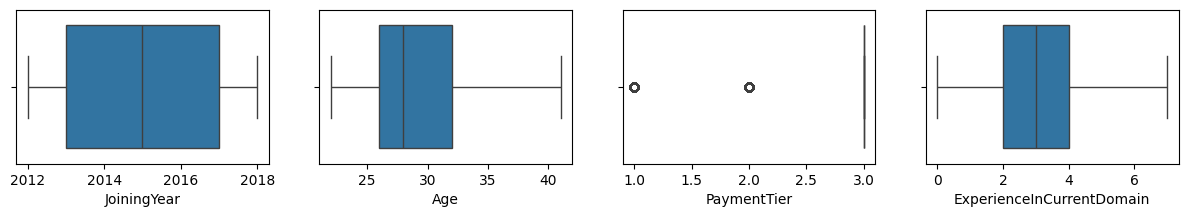

In [ ]:
# Membuat figure dengan subplots
fig, axes = plt.subplots(1, 4, figsize=(15, 2))

sns.boxplot(ax=axes[0], x=employee.JoiningYear)
sns.boxplot(ax=axes[1], x=employee.Age)
sns.boxplot(ax=axes[2], x=employee.PaymentTier)
sns.boxplot(ax=axes[3], x=employee.ExperienceInCurrentDomain)

In [ ]:
statistics = {
    'Column': [],
    'Min': [],
    'Q1': [],
    'Median': [],
    'Q3': [],
    'Max': [],
    'Outliers': []
}
columns_to_analyze = ['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain']

for column in columns_to_analyze:
    q1 = employee[column].quantile(0.25)
    q3 = employee[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = employee[(employee[column] < lower_bound) | (employee[column] > upper_bound)][column].count()

    statistics['Column'].append(column)
    statistics['Min'].append(employee[column].min())
    statistics['Q1'].append(q1)
    statistics['Median'].append(employee[column].median())
    statistics['Q3'].append(q3)
    statistics['Max'].append(employee[column].max())
    statistics['Outliers'].append(outliers)

# Mengubah statistik ke dalam DataFrame
statistics_df = pd.DataFrame(statistics)

# Menampilkan statistik dalam format teks (matriks)
print(statistics_df)

                      Column   Min      Q1  Median      Q3   Max  Outliers
0                JoiningYear  2012  2013.0  2015.0  2017.0  2018         0
1                PaymentTier     1     3.0     3.0     3.0     3      1161
2                        Age    22    26.0    28.0    32.0    41         0
3  ExperienceInCurrentDomain     0     2.0     3.0     4.0     7         0


Berdasarkan hasil statistik deskriptif yang diperoleh, beberapa kesimpulan dapat diambil mengenai dataset yang dianalisis. Berikut adalah analisis untuk setiap kolom:

1. **JoiningYear**:
   - **Rentang Tahun**: Data mencakup tahun dari 2012 hingga 2018, dengan Q1 pada 2013 dan median di 2015.
   - **Outliers**: Tidak ditemukan outlier, yang menunjukkan bahwa distribusi data cukup konsisten.

2. **PaymentTier**:
   - **Rentang**: Nilai payment tier bervariasi antara 1 hingga 3, dengan mayoritas data berada pada tier 3, terlihat dari Q1, median, dan Q3 yang semuanya bernilai 3.
   - **Outliers**: Teridentifikasi 1161 outlier yang cukup signifikan. Hal ini menunjukkan adanya sejumlah data yang berada di luar rentang normal, yang mungkin memerlukan investigasi lebih lanjut.

3. **Age**:
   - **Rentang Usia**: Usia karyawan berkisar antara 22 hingga 41 tahun, dengan median pada usia 28 tahun dan Q1 di 26 tahun, yang menunjukkan bahwa sebagian besar karyawan berada pada usia dewasa muda hingga paruh baya.
   - **Outliers**: Tidak ditemukan outlier, yang menandakan distribusi usia yang relatif normal.

4. **ExperienceInCurrentDomain**:
   - **Rentang Pengalaman**: Pengalaman karyawan bervariasi antara 0 hingga 7 tahun, dengan median di 3 tahun, yang menunjukkan banyaknya karyawan yang relatif baru dalam domain pekerjaan mereka.
   - **Outliers**: Tidak ada outlier terdeteksi, menandakan distribusi pengalaman yang stabil.

**Outlier pada PaymentTier**: Mengingat adanya 1161 outlier dalam kolom `PaymentTier`, dapat dilihat bahwa `PaymentTier` memiliki lebih banyak outlier. Di sini, diputuskan untuk mempertahankan outlier dalam dataset klasifikasi `LeaveOrNot` karena data tersebut mencerminkan kondisi nyata dalam struktur organisasi. Dalam analisis yang dilakukan, terlihat bahwa jumlah karyawan pada level pembayaran yang lebih rendah jauh lebih banyak dibandingkan dengan level yang lebih tinggi. Ini adalah representasi yang valid dari situasi yang ada di perusahaan, di mana mayoritas karyawan berada di tier pembayaran yang lebih rendah. Hal ini juga dipengaruhi oleh kenyataan bahwa jabatan tinggi biasanya memiliki tingkat pembayaran yang lebih tinggi, namun jabatan-jabatan tersebut sangat sedikit jumlahnya di setiap perusahaan, sementara sebagian besar posisi diisi oleh karyawan di tingkat staff yang memiliki tier pembayaran lebih rendah.

Mempertahankan outliers memungkinkan model untuk mempertimbangkan semua aspek yang berkontribusi terhadap keputusan karyawan. Jika ada faktor-faktor tertentu yang menyebabkan karyawan pada level bawah memilih untuk meninggalkan perusahaan, model harus memiliki data tersebut untuk menganalisis dan memberikan wawasan yang berharga bagi manajemen

### 3.2.3 *Univariate Analysis*

Melakukan proses analysis data univariate

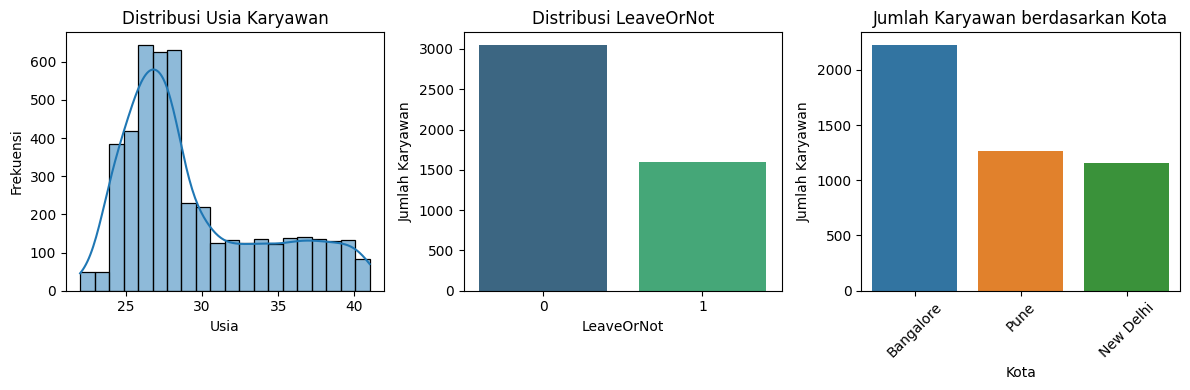

In [ ]:
fig1, axs1 = plt.subplots(1, 3, figsize=(12, 4))

# 1. Memeriksa distribusi kolom numerik (Usia)
sns.histplot(employee['Age'], bins=20, kde=True, ax=axs1[0])
axs1[0].set_title('Distribusi Usia Karyawan')
axs1[0].set_xlabel('Usia')
axs1[0].set_ylabel('Frekuensi')

# 2. Memeriksa distribusi kategori untuk 'LeaveOrNot'
sns.countplot(data=employee, x='LeaveOrNot', hue='LeaveOrNot', ax=axs1[1], palette='viridis', legend=False)
axs1[1].set_title('Distribusi LeaveOrNot')
axs1[1].set_xlabel('LeaveOrNot')
axs1[1].set_ylabel('Jumlah Karyawan')

# 3. Menampilkan jumlah karyawan berdasarkan Kota
sns.countplot(data=employee, x='City', hue='City', ax=axs1[2], legend=False)
axs1[2].set_title('Jumlah Karyawan berdasarkan Kota')
axs1[2].set_xlabel('Kota')
axs1[2].set_ylabel('Jumlah Karyawan')
axs1[2].tick_params(axis='x', rotation=45)

# Menyesuaikan layout
plt.tight_layout()
plt.show()


#### 1. **Distribusi Usia Karyawan**

Berdasarkan distribusi usia karyawan yang terbagi dalam beberapa rentang usia, terlihat kecenderungan bahwa sebagian besar karyawan berada pada rentang usia muda, dengan jumlah yang lebih banyak di beberapa rentang usia tertentu. Beberapa rentang usia menunjukkan konsentrasi yang lebih tinggi, sementara rentang usia yang lebih tua cenderung memiliki jumlah yang lebih sedikit. Hal ini mengindikasikan bahwa perusahaan kemungkinan besar memiliki proporsi karyawan yang lebih banyak di awal karier mereka, sementara jumlah karyawan yang lebih tua relatif lebih rendah.

#### 2. **Distribusi LeaveOrNot**

Distribusi data pada kolom **LeaveOrNot** menunjukkan bahwa kurang lebih **3000 karyawan** tidak meninggalkan perusahaan, sementara **1600 karyawan** memutuskan untuk meninggalkan perusahaan. Dari data ini, dapat disimpulkan bahwa sebagian besar karyawan memilih untuk tetap bertahan di perusahaan. Meskipun demikian, angka karyawan yang memilih untuk meninggalkan perusahaan cukup signifikan, yang menunjukkan bahwa meskipun banyak yang bertahan, perusahaan juga mengalami tingkat perputaran karyawan yang tidak bisa diabaikan.



#### 3. **Jumlah Karyawan Berdasarkan Kota**

Distribusi jumlah karyawan berdasarkan kota menunjukkan bahwa **Bangalore** memiliki jumlah karyawan terbanyak, diikuti oleh **Pune**, dan **New Delhi** . Hal ini mengindikasikan bahwa Bangalore merupakan lokasi dengan konsentrasi karyawan yang paling tinggi, yang kemungkinan besar merupakan pusat operasional atau kantor utama perusahaan. Sementara itu, Pune dan New Delhi memiliki jumlah karyawan yang lebih sedikit, meskipun masih tergolong signifikan.

### 3.2.4 *Multivariate Analysis*

Melakukan visualisasi distribusi data untuk fitur-fitur numerik dalam dataframe *employee*. Visualisasi ini menggunakan library seaborn dengan fungsi *pairplot*, dengan parameter `diag_kind='kde'` untuk menggambarkan estimasi distribusi probabilitas antar fitur numerik berdasarkan kolom *LeaveOrNot*.

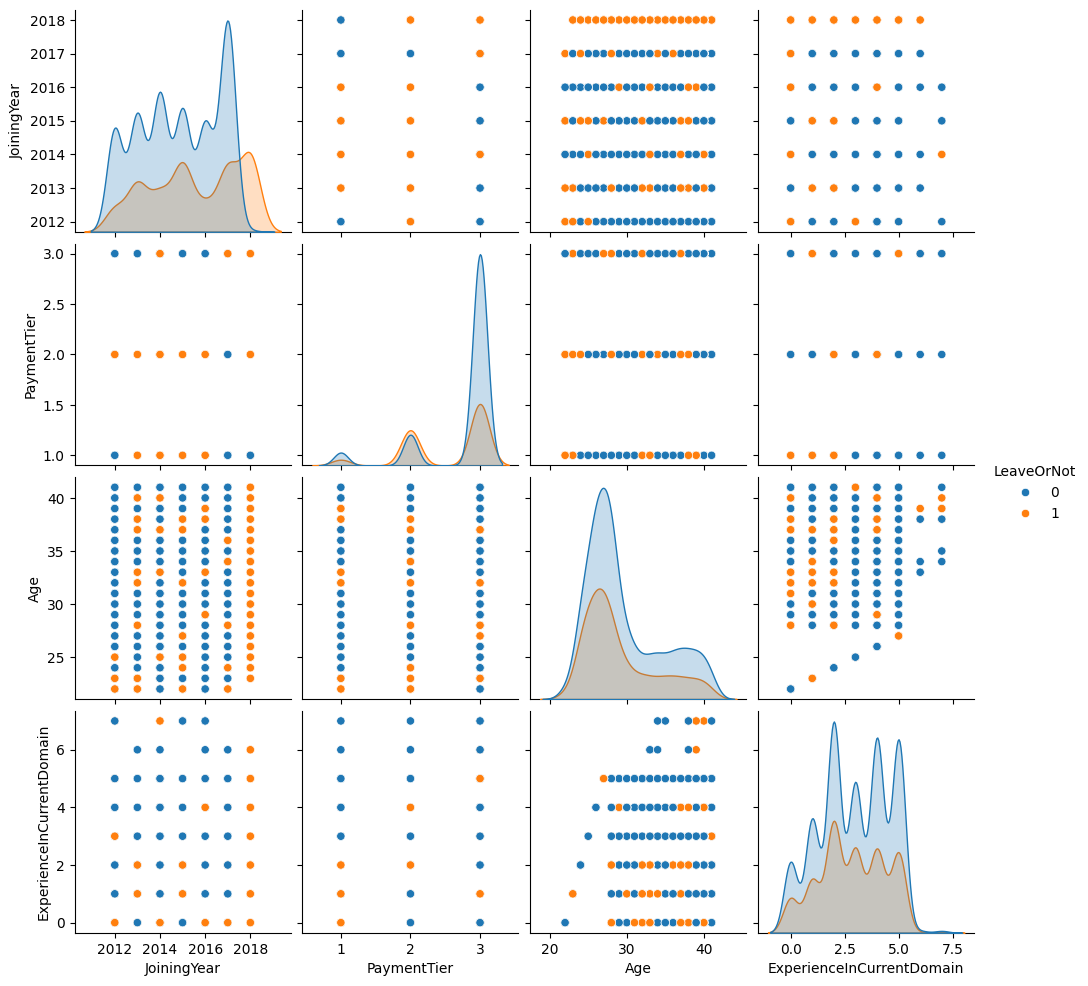

In [ ]:
sns.pairplot(employee, hue='LeaveOrNot', diag_kind='kde')
plt.show()

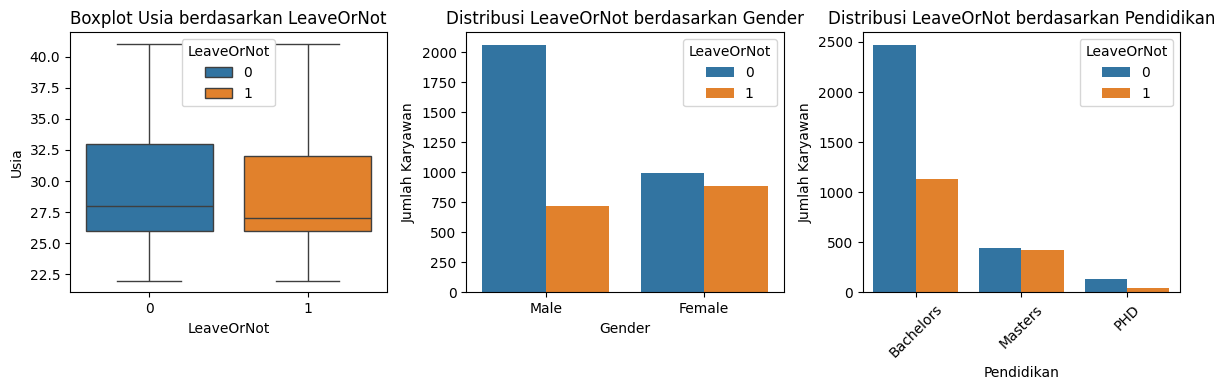

In [ ]:
fig2, axs2 = plt.subplots(1, 3, figsize=(12, 4))

# 1. Memvisualisasikan hubungan antara fitur numerik dan LeaveOrNot
sns.boxplot(data=employee, x='LeaveOrNot', y='Age', hue='LeaveOrNot', ax=axs2[0])
axs2[0].set_title('Boxplot Usia berdasarkan LeaveOrNot')
axs2[0].set_xlabel('LeaveOrNot')
axs2[0].set_ylabel('Usia')

# 2. Visualisasi hubungan antara kategori lain dan LeaveOrNot (Gender)
sns.countplot(data=employee, x='Gender', hue='LeaveOrNot', ax=axs2[1])
axs2[1].set_title('Distribusi LeaveOrNot berdasarkan Gender')
axs2[1].set_xlabel('Gender')
axs2[1].set_ylabel('Jumlah Karyawan')

# 3. Memeriksa hubungan antara Pendidikan dan LeaveOrNot
sns.countplot(data=employee, x='Education', hue='LeaveOrNot', ax=axs2[2])
axs2[2].set_title('Distribusi LeaveOrNot berdasarkan Pendidikan')
axs2[2].set_xlabel('Pendidikan')
axs2[2].set_ylabel('Jumlah Karyawan')
axs2[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



1. **Statistik Usia Berdasarkan Status Meninggalkan Perusahaan**:
Rata-rata usia karyawan yang meninggalkan perusahaan sedikit lebih rendah dibandingkan dengan mereka yang tetap tinggal, meskipun perbedaannya tidak signifikan.

2. **Distribusi Berdasarkan Gender**:
Lebih banyak karyawan laki-laki yang tetap tinggal di perusahaan, sementara karyawan perempuan lebih banyak yang meninggalkan perusahaan.

3. **Distribusi Berdasarkan Pendidikan**:
Karyawan dengan tingkat pendidikan lebih tinggi (Magister dan Doktor) cenderung lebih banyak meninggalkan perusahaan dibandingkan dengan mereka yang berpendidikan Sarjana.

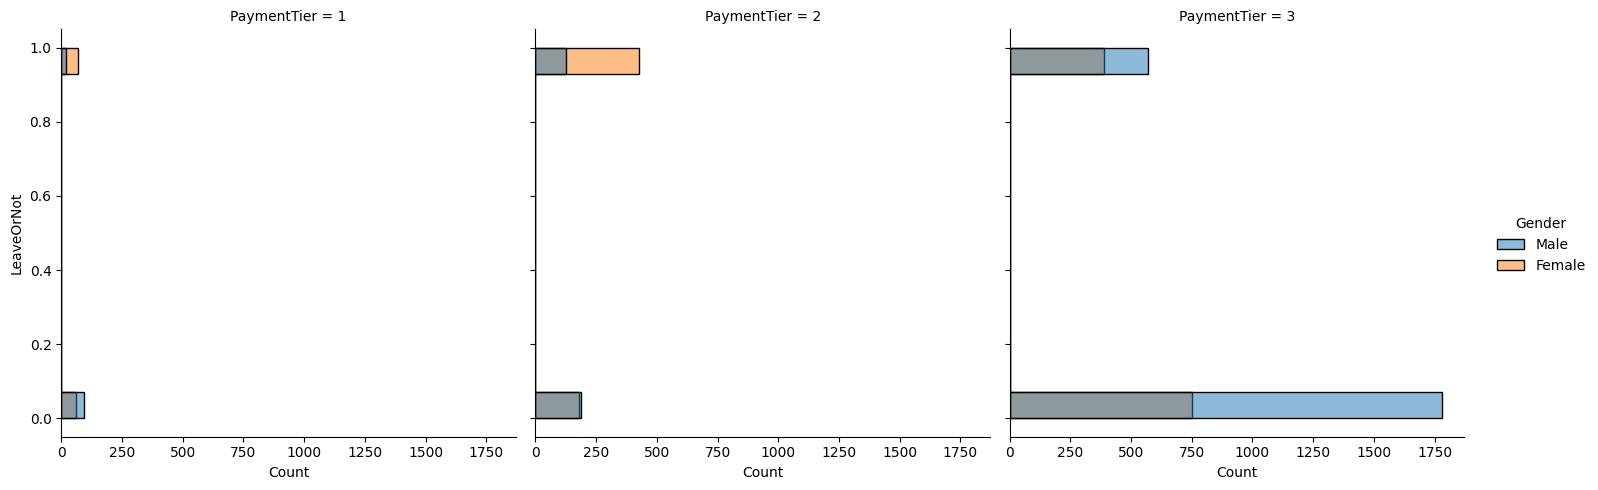

In [ ]:
sns.displot(data=employee, y="LeaveOrNot", legend=True, hue="Gender",col="PaymentTier")

1. Pada **Payment Tier 1** (pekerjaan dengan gaji lebih rendah), lebih banyak karyawan perempuan yang meninggalkan perusahaan dibandingkan dengan karyawan laki-laki. Sementara itu, lebih banyak karyawan laki-laki yang memilih untuk tetap bekerja di perusahaan.
   
2. Pada **Payment Tier 2**, sekali lagi, lebih banyak karyawan perempuan yang meninggalkan perusahaan dibandingkan dengan karyawan laki-laki. Hal ini menunjukkan bahwa karyawan laki-laki cenderung lebih bertahan dan tetap bekerja di perusahaan.

3. Namun, pada **Payment Tier 3**, laki-laki menunjukkan pola yang berbeda, dengan lebih banyak yang berpindah pekerjaan dibandingkan dengan rekan perempuan mereka.

### 3.2.5 *Correlation Matrix* menggunakan *Heatmap*

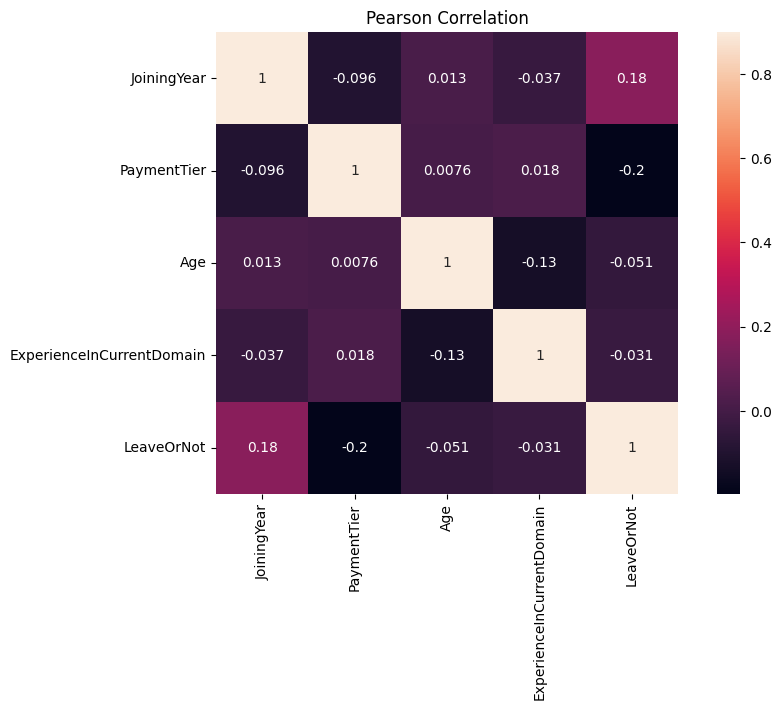

In [ ]:
plt.figure(figsize=(10, 6))

numerical_cols = employee.select_dtypes(include=[np.number])

sns.heatmap(numerical_cols.corr(), vmax=0.9, square=True, annot=True)
plt.title("Pearson Correlation")
plt.show()


Berikut adalah hasil analisis korelasi matriks yang dapat disimpulkan:

1. **LeaveOrNot (Meninggalkan Perusahaan)**:
   - **JoiningYear dan LeaveOrNot**: Terdapat korelasi positif sebesar **0.18**, yang menunjukkan bahwa karyawan yang baru bergabung cenderung memiliki kemungkinan lebih besar untuk meninggalkan perusahaan. Hal ini mengindikasikan bahwa karyawan yang baru bergabung mungkin merasa kurang terikat atau memiliki lebih banyak peluang di luar perusahaan.
   
   - **PaymentTier dan LeaveOrNot**: Korelasi negatif sebesar **-0.19** menunjukkan bahwa karyawan dengan tingkat pembayaran lebih tinggi cenderung lebih jarang meninggalkan perusahaan. Ini bisa menandakan bahwa kompensasi yang lebih baik meningkatkan kepuasan kerja dan motivasi untuk tetap bertahan.

2. **Variabel Lain**:
   - **Age dan ExperienceInCurrentDomain**: Korelasi negatif antara `Age` dan `ExperienceInCurrentDomain` sebesar **-0.13** menunjukkan bahwa karyawan yang lebih tua cenderung memiliki pengalaman lebih banyak di berbagai domain atau sering berpindah pekerjaan.

3. **Interpretasi Umum**:
   - Secara keseluruhan, variabel **JoiningYear** dan **PaymentTier** tampaknya menjadi faktor penting dalam keputusan karyawan untuk meninggalkan perusahaan. Karyawan yang baru bergabung atau yang memiliki tingkat pembayaran lebih rendah cenderung lebih besar kemungkinan untuk meninggalkan perusahaan.

# **4. *Data Preparation***

## 4.1 *Label Encoding*

**Data kategorikal diubah menjadi nilai numerik**

Label Encoding digunakan karena setiap kategori dalam kolom akan diubah menjadi nilai numerik yang sesuai.

Ini bertujuan untuk mempersiapkan data dengan mengonversi kolom-kolom kategorikal dalam dataset menjadi format numerik, yang diperlukan untuk digunakan dalam model machine learning. Adapun langkah-langkah yang dilakukan adalah sebagai berikut:

1. **Konversi Kolom Kategorikal Menjadi Kode Numerik**: Kolom-kolom dengan data kategorikal seperti `Education`, `City`, `Gender`, dan `EverBenched` diubah menjadi tipe data kategorikal, kemudian setiap kategori tersebut dikodekan ke dalam bentuk numerik. Hal ini dilakukan karena algoritma machine learning umumnya memerlukan data dalam format numerik agar dapat diolah dengan baik.

2. **Verifikasi Hasil Konversi**: Setelah konversi, tipe data untuk setiap kolom diperiksa untuk memastikan bahwa perubahan ke format numerik telah berhasil dilakukan. Selain itu, lima baris pertama dari dataset ditampilkan untuk memverifikasi hasil konversi dan memastikan bahwa data sudah siap digunakan dalam analisis lebih lanjut.

In [ ]:
df = pd.DataFrame(employee)

categorical_columns = ['Education', 'City', 'Gender', 'EverBenched']

before_after_mapping = {}

for column in categorical_columns:
    df[column] = df[column].astype('category')

    # mapping kategori sebelum dan setelah diubah
    before_after_mapping[column] = dict(enumerate(df[column].cat.categories))

    print(f"Mapping untuk kolom '{column}':")
    for category, code in before_after_mapping[column].items():
        print(f"{category} -> {code}")



Mapping untuk kolom 'Education':
0 -> Bachelors
1 -> Masters
2 -> PHD
Mapping untuk kolom 'City':
0 -> Bangalore
1 -> New Delhi
2 -> Pune
Mapping untuk kolom 'Gender':
0 -> Female
1 -> Male
Mapping untuk kolom 'EverBenched':
0 -> No
1 -> Yes


In [ ]:
# Mengubah kolom menjadi variabel kategorikal dan kemudian menjadi kode numerik
for column in categorical_columns:
    df[column] = df[column].cat.codes

print("\nTipe Data Kolom Setelah Pengubahan:")
print(df.dtypes)

print("\nDataFrame Setelah Pengubahan:")
df.head()



Tipe Data Kolom Setelah Pengubahan:
Education                     int8
JoiningYear                  int64
City                          int8
PaymentTier                  int64
Age                          int64
Gender                        int8
EverBenched                   int8
ExperienceInCurrentDomain    int64
LeaveOrNot                   int64
dtype: object

DataFrame Setelah Pengubahan:


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1


## 4.2 *Split Data*

Menentukan variabel **x** yang berisi fitur-fitur yang digunakan untuk memprediksi keputusan meninggalkan perusahaan (LeaveOrNot), dengan mengecualikan kolom **LeaveOrNot** sebagai fitur, serta variabel **y** yang merupakan target atau nilai yang akan diprediksi, yaitu kolom **LeaveOrNot**.

In [ ]:
#split data
X = df.drop('LeaveOrNot', axis = 1)
y = df['LeaveOrNot']

Melakukan pembagian dataset menggunakan **train_test_split** untuk memisahkan data menjadi data latih (training) dan data uji (testing), dengan proporsi 70% untuk data latih dan 30% untuk data uji. Kemudian, menampilkan jumlah total data, serta jumlah data latih dan data uji.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(f'Dimensi data training (X_train): {X_train.shape}')
print(f'Dimensi target training (y_train): {y_train.shape}')
print(f'Dimensi data testing (X_test): {X_test.shape}')
print(f'Dimensi target testing (y_test): {y_test.shape}')

Dimensi data training (X_train): (3257, 8)
Dimensi target training (y_train): (3257,)
Dimensi data testing (X_test): (1396, 8)
Dimensi target testing (y_test): (1396,)


# **5. *Model Development***

## *5.1 K-Nearest Neighbor (KNN) Algorithm*

In [ ]:
#K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors = 5)
%time knn.fit(X_train, y_train)
knn.score(X_test, y_test)

CPU times: user 7.41 ms, sys: 43 µs, total: 7.45 ms
Wall time: 8.1 ms


0.7636103151862464

## *5.2 Decision Tree Classifier Algorithm*

In [ ]:
#Decision Tree Classifier
dtc = DecisionTreeClassifier(max_depth = 3)
%time dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

CPU times: user 6.09 ms, sys: 12 µs, total: 6.1 ms
Wall time: 7.12 ms


0.7800859598853869

## *5.3 Random Forest Classifier Algorithm*

In [ ]:
#Random Forest Classifier
rf = RandomForestClassifier(random_state = 1, max_features = 'sqrt', n_jobs = 1, verbose = 1)
%time rf.fit(X_train, y_train)
rf.score(X_test, y_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


CPU times: user 350 ms, sys: 16.1 ms, total: 366 ms
Wall time: 370 ms


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


0.826647564469914

# **6. *Model Evaluation***


## *6.1 Evaluating Classification Model Performance*


In [ ]:
metric_results = []

# Daftar model yang sudah dilatih
trained_models = {
    "K-Nearest Neighbors": knn,
    "Decision Tree": dtc,
    "Random Forest": rf
}

# Loop untuk membuat prediksi dan menghitung metrik
for name, model in trained_models.items():
    # Membuat prediksi pada data uji
    y_pred = model.predict(X_test)

    # Menghitung metrik
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Menyimpan hasil metrik ke list
    metric_results.append([name, accuracy, precision, recall, f1])

metric_df = pd.DataFrame(metric_results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(metric_df)


                 Model  Accuracy  Precision    Recall  F1 Score
0  K-Nearest Neighbors  0.763610   0.756675  0.763610  0.753702
1        Decision Tree  0.780086   0.782654  0.780086  0.762663
2        Random Forest  0.826648   0.823810  0.826648  0.823280


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Output tersebut menunjukkan hasil evaluasi tiga model klasifikasi: K-Nearest Neighbors (KNN), Decision Tree, dan Random Forest, dengan metrik **Accuracy**, **Precision**, **Recall**, dan **F1 Score**.

- **Random Forest** menunjukkan performa terbaik dengan akurasi (82.66%), precision (82.38%), recall (82.66%), dan F1 score (82.33%).
- **Decision Tree** berada di posisi kedua, dengan akurasi 78.01%, precision 78.27%, recall 78.01%, dan F1 score 76.27%.
- **K-Nearest Neighbors** memiliki akurasi terendah (76.36%) dibandingkan model lainnya.

Secara keseluruhan, **Random Forest** menunjukkan kinerja terbaik di antara ketiga model.

## *6.2 Cross-Validation and Boxplot Visualization*

Menggunakan seluruh dataset untuk cross-validation memungkinkan model dilatih dan diuji pada semua data yang tersedia. Ini memberikan gambaran umum tentang performa model pada data yang belum pernah dilihat sebelumnya, dan berguna untuk evaluasi model secara keseluruhan, terutama saat data terbatas.


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

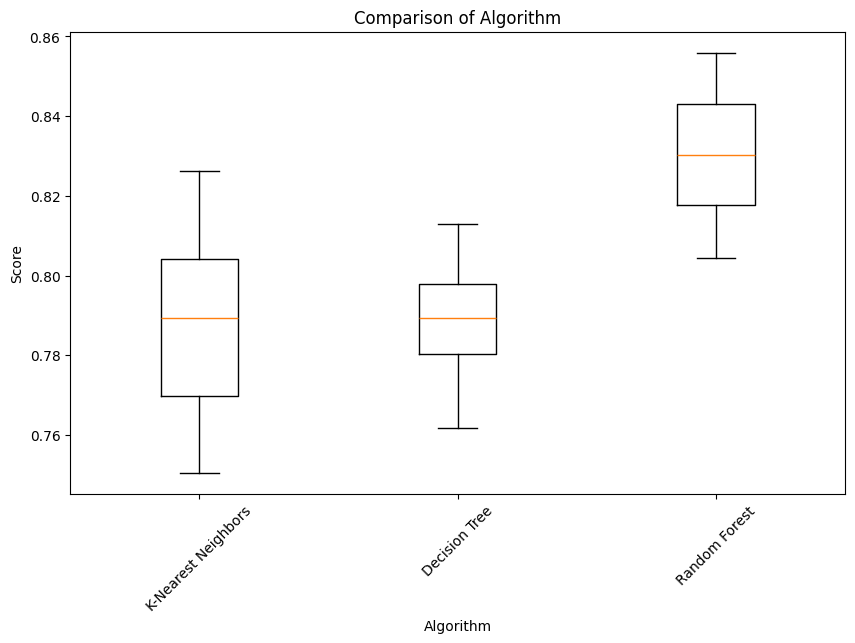

In [ ]:
# Menyusun cross-validation dan visualisasi boxplot untuk setiap model
def evaluate_models(trained_models, X, y, n_splits=10):
    results = []

    kfold = KFold(n_splits=n_splits)
    for name, model in trained_models.items():
        scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
        results.append(scores)

    return results, list(trained_models.keys())

results, names = evaluate_models(trained_models, X, y)

plt.figure(figsize=(10, 6))
plt.title('Comparison of Algorithm')
plt.boxplot(results)
plt.xticks(ticks=range(1, len(names) + 1), labels=names, rotation=45)
plt.xlabel("Algorithm")
plt.ylabel("Score")
plt.show()


Dataset dibagi menjadi 10 bagian menggunakan KFold dan model dilatih serta diuji pada setiap bagian secara bergantian. Hasil akurasi dari setiap model disimpan dan divisualisasikan dengan boxplot untuk perbandingan. Penggunaan cross-validation memungkinkan model dilatih dan diuji pada semua data, memberikan gambaran yang lebih akurat tentang performa model pada data yang tidak terlihat sebelumnya, serta mengurangi risiko overfitting pada data terbatas.

Dapat dilihat bahwa Random Forest menunjukkan performa terbaik dalam boxplot

## *6.3 Find the best model*

Mencari model terbaik dari setiap model yang sudah ada

In [ ]:
# Menghitung nilai rata-rata untuk setiap model berdasarkan Accuracy
metric_df['Mean Accuracy'] = metric_df['Accuracy']

# Mencari model dengan Accuracy tertinggi
best_model_row = metric_df.loc[metric_df['Accuracy'].idxmax()]

# Menampilkan hasil model terbaik
best_model_name = best_model_row['Model']
best_model_accuracy = best_model_row['Accuracy']

print(f"\nBest Model: {best_model_name} with Accuracy = {best_model_accuracy:.4f}")



Best Model: Random Forest with Accuracy = 0.8266


Melatih model terbaik menggunakan data latih, kemudian memanfaatkan model tersebut untuk memprediksi kelas pada data uji yang belum pernah dilihat sebelumnya, dan menampilkan hasil prediksinya.

In [ ]:
best_model = trained_models[best_model_name]
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
print("Predictions on Test Set:")
print(y_pred)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


Predictions on Test Set:
[0 1 0 ... 0 0 0]


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s



## *6.4 Confusion Matrix*

Confusion Matrix memberikan gambaran yang jelas mengenai performa model klasifikasi dengan menunjukkan jumlah prediksi yang benar dan salah untuk setiap kelas. Kemudian dilakukan visualisasi, visualisasi menggunakan heatmap mempermudah interpretasi confusion matrix

[[833  89]
 [153 321]]


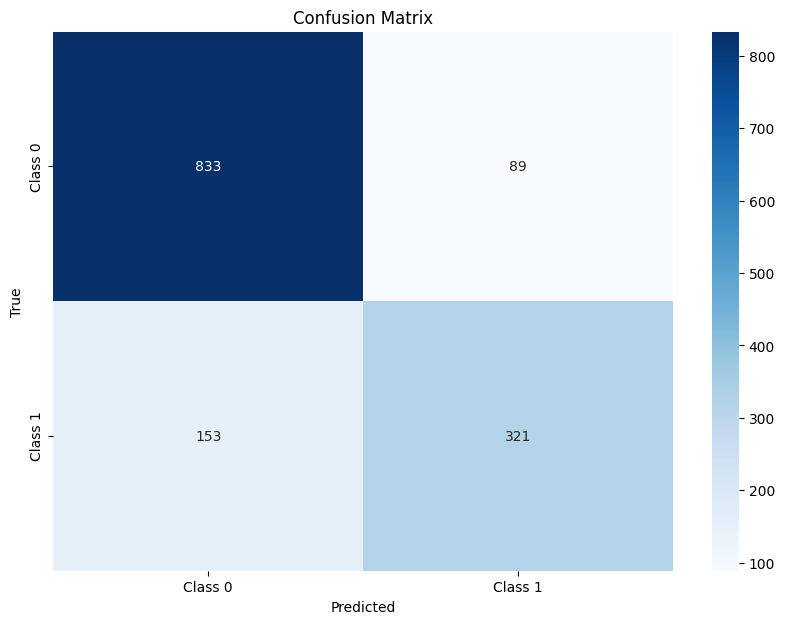

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Visualisasikan dengan heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Menunjukkan hasil prediksi model untuk data **LeaveOrNot**. Angka-angka tersebut dapat diartikan sebagai:

- **True Negative (833)**: Karyawan yang tidak meninggalkan perusahaan dan diprediksi dengan benar.
- **False Positive (89)**: Karyawan yang tidak meninggalkan perusahaan, tetapi diprediksi akan pergi.
- **False Negative (153)**: Karyawan yang akan pergi, tetapi diprediksi tidak pergi.
- **True Positive (321)**: Karyawan yang akan pergi dan diprediksi dengan benar.


## *6.5 Defining of feature*

JoiningYear                  0.328431
Age                          0.163789
City                         0.113360
PaymentTier                  0.100830
Gender                       0.095597
Education                    0.092952
ExperienceInCurrentDomain    0.086311
EverBenched                  0.018730
dtype: float64


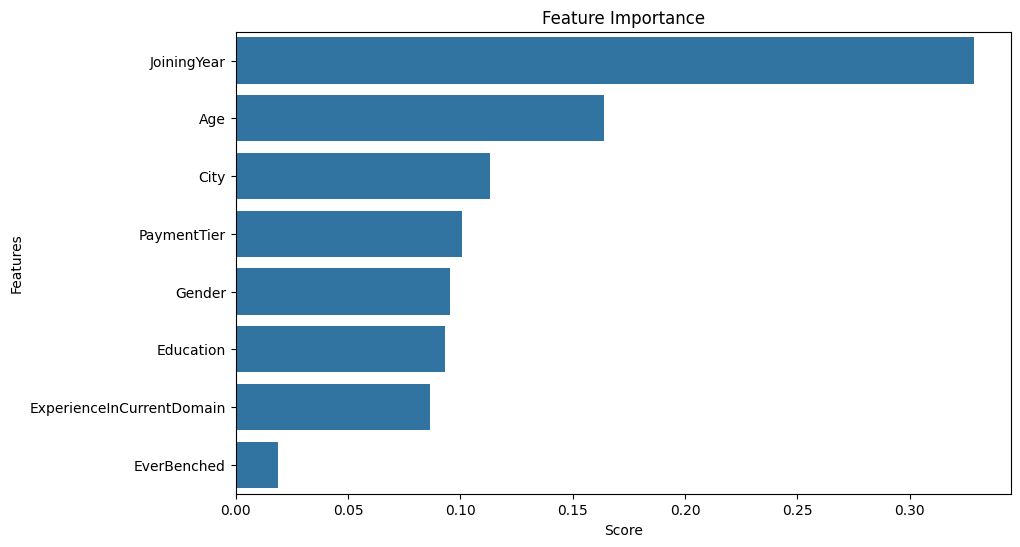

In [ ]:
#defining of feature
feature = pd.Series(best_model.feature_importances_, index = X_train.columns).sort_values(ascending = False)
print(feature)

#visualize feature
plt.figure(figsize = (10,6))
sns.barplot(x = feature, y = feature.index)
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()

Berikut adalah fitur fitur yang paling berpengaruh dalam memprediksi apakah karyawan akan meninggalkan perusahaan berdasarkan model yang digunakan:

1. **JoiningYear** (Tahun Bergabung) memiliki pengaruh terbesar, diikuti oleh **Age** (Usia) dan **City** (Kota Tempat Tinggal), yang menunjukkan faktor-faktor ini berkontribusi signifikan terhadap keputusan karyawan untuk tetap atau meninggalkan perusahaan.
   
2. **PaymentTier** (Tingkat Pembayaran) dan **Gender** (Jenis Kelamin) juga mempengaruhi keputusan tersebut, meskipun dengan kontribusi yang lebih kecil.

3. **Education** (Pendidikan) dan **ExperienceInCurrentDomain** (Pengalaman di Domain Pekerjaan) memiliki pengaruh moderat dalam prediksi.

4. **EverBenched** (Status Pernah Tidak Aktif) menunjukkan pengaruh yang paling kecil terhadap keputusan karyawan untuk meninggalkan perusahaan.

Secara keseluruhan, **JoiningYear** adalah memberikan pengaruh yang paling penting dalam memprediksi kemungkinan karyawan meninggalkan perusahaan, sementara **EverBenched** memiliki pengaruh yang paling minimal.